# 1st Assignment - Numerical optimization and large scale linear algebra

---

> Nikos Tsoukalelis, Data Science Part Time student, 2022 <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

> #### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from numpy.linalg import qr
from termcolor import colored
from plotnine import *
import plotnine as p9
import matplotlib.pyplot as plt

## Exercise 1:

### <font size="4">1.</font>  Create two graphs to show the illumination of the two patterns: The first with all lamps set to 1 and the other that minimize the sum square deviation with a desired uniform illumination. 
###  Which are the RMS errors in both cases?

> #### Firtsly we create our datasets to build the  $l = Ap$ model.

In [2]:
# position of the lights array
light_position = np.array([(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4),
(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)])

# power (p) of light (on) that's why we put 1
p = np.ones((10,1))

# our A array firstly we fill it with zeros
A=np.full((625, 10), 0.)

# construction of table A (tall table)

for i in range(0,25):
    for j in range(0,25):
        index=0
        for c in (light_position):
            
            A[i*25+j, index] = np.power(np.linalg.norm((np.array([i+0.5,j+0.5,0]) - c)),2)
            A[i*25+j, index]=np.power(A[i*25+j, index],-1)
            
            index=index+1


> #### We then try to calculate the average illumination. To do that we firstly calculate the product of A times p. Although that will provide a column matrix.
> #### This is why we resahpe to get the 25x25 matrix. Afer that we calculate the number for which average illumination is equal to one, in other words we scale A.

In [3]:
illum = A.dot(p)
illum=illum.reshape((25,25)).T

In [4]:
# finding illumination
illum = A.dot(p)
illum=illum.reshape((25,25)).T

# we want mean illumination = 1 so mean illumination multiplied by a number giving 1. So avg_ill*a = 1 =>  a=1/avg_ill 
scale=1/illum.mean()

# so the new scaled A table
A = A * scale 

> #### The new illumination matrix.

In [5]:
illum = A.dot(p)
illum=illum.reshape((25,25)).T

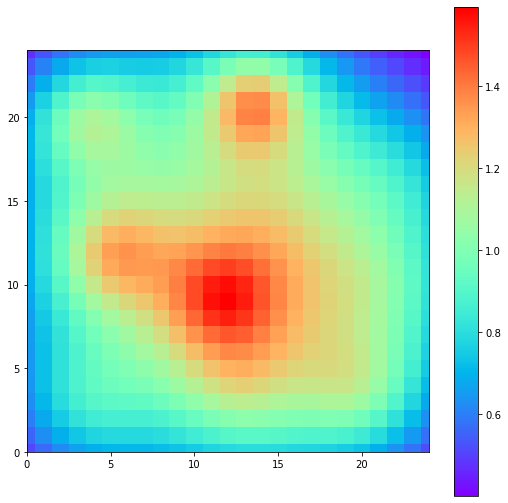

In [6]:
plt.figure(figsize=(9,9))

plt.ylim(0,24)
plt.xlim(0,24)

plt.imshow(illum, cmap='rainbow', interpolation='none')
plt.colorbar()
plt.show()

> #### Now we are going to work and find the value of p that minimizes the: . We use the QR method to reach to the solution as it a preferable method and easily 
> #### implemented.

In [7]:
# We create the a matrix called luminosity for depicting the l-desireable  (l des)
luminosity =np.full((625, 1), 1.)

# QR decomposition
Q, R = qr(A)
b_power = inv(R).dot(Q.T).dot(luminosity)
print(b_power)

[[1.46211018]
 [0.78797433]
 [2.96641047]
 [0.74358042]
 [0.08317333]
 [0.21263945]
 [0.21218408]
 [2.05114815]
 [0.90760315]
 [1.47222464]]


In [8]:
illum_des = A.dot(b_power)
illum_des=illum_des.reshape((25,25)).T

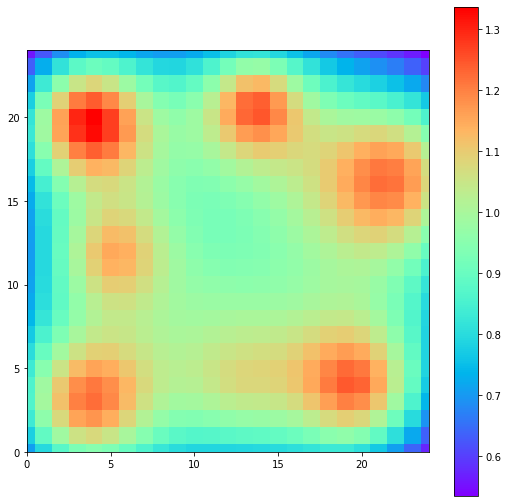

In [9]:
plt.figure(figsize=(9,9))

plt.ylim(0,24)
plt.xlim(0,24)

plt.imshow(illum_des, cmap='rainbow', interpolation='none')
plt.colorbar()
plt.show()

> #### Final step is to calculate the RMS errors for both cases.

In [10]:
# We flatten our arrays (illum) first so we can compute the RMS
illum_flatten=illum.flatten()
illum_des_flatten=illum_des.flatten()

#calculation of RMS
RMS_1 = mean_squared_error(illum_flatten, luminosity, squared=False)
RMS_2 = mean_squared_error(illum_des_flatten, luminosity, squared=False)

print("")
print('The Root Mean Square Error (RMSE) for the 1st case (all p = 1) RMS_1 = {} '.format(round(RMS_1,4)))
print("")
print('The Root Mean Square Error (RMSE) for the 2nd case (desired uniform illumination) RMS_2 = {} '.format(round(RMS_2,4)))


The Root Mean Square Error (RMSE) for the 1st case (all p = 1) RMS_1 = 0.2417 

The Root Mean Square Error (RMSE) for the 2nd case (desired uniform illumination) RMS_2 = 0.1404 


### <font size="4">2.</font> Create the histogram of patch illumination values for all lamp powers one, and for lamp powers found by LS.

> #### We first create the histogram of patch illumination values for all lamp powers one.

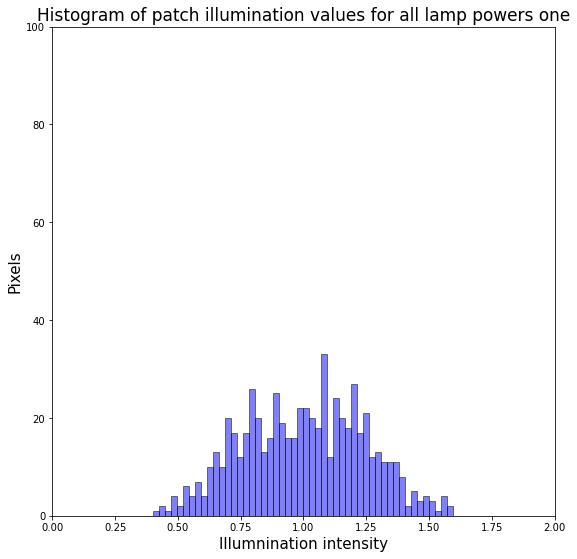

In [11]:
plt.figure(figsize=(9,9))
plt.ylim(0,100)
plt.xlim(0,2)

plt.title('Histogram of patch illumination values for all lamp powers one',fontsize=17)
plt.xlabel('Illumnination intensity', fontsize=15)
plt.ylabel('Pixels',fontsize=15)

plt.hist(illum_flatten, 50, density=False, facecolor='b', alpha=0.5, histtype='bar', ec='black')
plt.show()

> #### And lastly we create the histogram for lamp powers found by LS.

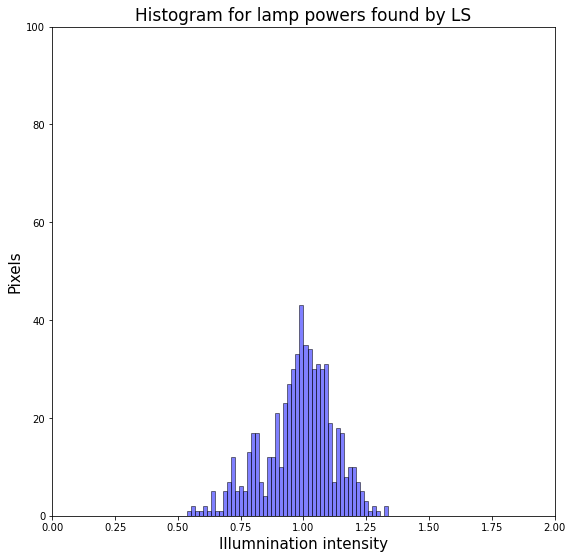

In [12]:
plt.figure(figsize=(9,9))
plt.ylim(0,100)
plt.xlim(0,2)

plt.title('Histogram for lamp powers found by LS',fontsize=17)
plt.xlabel('Illumnination intensity', fontsize=15)
plt.ylabel('Pixels',fontsize=15)

plt.hist(illum_des_flatten, 50, density=False, facecolor='b', alpha=0.5, histtype='bar', ec='black')
plt.show()

---

## Exercise 2:

###  Your aim is to predict whether a given banknote is authentic given a number of measures. In the file you can find the training and test set with the corresponding outputs.

> #### Importing thedata from the csv files given.

In [13]:
train_backnotes=pd.read_csv("train_backnotes.csv")
train_backnotes_l=pd.read_csv("train_backnotes_l.csv")
test_backnotes=pd.read_csv("test_backnotes.csv")
test_backnotes_l=pd.read_csv("test_backnotes_l.csv")

> #### Deleting some unnecessary columns that are created during the reading process of the csv files

In [14]:
train_backnotes=train_backnotes.drop(['Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1)
train_backnotes['marker']=train_backnotes['Unnamed: 0']
train_backnotes=train_backnotes[['marker','variance','skewness','kurtosis','entropy','output']]

In [15]:
train_backnotes

,marker,variance,skewness,kurtosis,entropy,output
0,466,1.14720,3.598500,1.93870,-0.434060,0
1,909,-1.73220,-9.282800,7.71900,-1.716800,1
2,1025,-1.10220,-5.839500,4.56410,0.687050,1
3,1134,-1.70630,2.795600,-2.37800,-2.349100,1
4,55,4.82650,0.802870,1.63710,1.187500,0
...,...,...,...,...,...,...
1024,162,0.17346,7.869500,0.26876,-3.788300,0
1025,1201,-0.87340,-0.033118,-0.20165,0.557740,1
1026,868,-4.49960,3.428800,0.56265,-1.167200,1
1027,218,-0.16735,7.627400,1.20610,-3.624100,0


In [16]:
test_backnotes.columns=['marker','variance','skewness','kurtosis','entropy']
test_backnotes

,marker,variance,skewness,kurtosis,entropy
0,2,3.86600,-2.63830,1.9242,0.10645
1,13,-1.57680,10.84300,2.5462,-2.93620
2,24,4.43380,9.88700,-4.6795,-3.74830
3,27,-0.38214,8.39090,2.1624,-3.74050
4,29,4.89060,-3.35840,3.4202,1.09050
...,...,...,...,...,...
338,1349,-1.58510,-2.15620,1.7082,0.90170
339,1365,-4.50460,-5.81260,10.8867,-0.52846
340,1367,0.40614,1.34920,-1.4501,-0.55949
341,1369,-3.75030,-13.45860,17.5932,-2.77710


> #### Splitting the train dataset to X_train and Y_train and test dataset to X_test and Y_test, adding a new column containing "ones" to create a model like: 
>#### <font color='dodgerblue'>$$ y = 1 + u1x1 + u2x2 + ... $$ </font>

In [17]:
#splitting the train dataset in X and Y 
X_train=train_backnotes[['marker','variance','skewness','kurtosis','entropy']]
X_train['intercept']=1
X_train=X_train[['intercept','variance','skewness','kurtosis','entropy']]
Y_train=train_backnotes['output']

#splitting the test dataset in X and Y 
X_test=test_backnotes[['marker','variance','skewness','kurtosis','entropy']]
X_test['intercept']=1
X_test=X_test[['intercept','variance','skewness','kurtosis','entropy']]
Y_test=test_backnotes_l['output']

> #### After manipulating our data to bring to our desired form we use sklean's linear regression function to create our model that is based in the calculation of the Least Square method.
> #### We then fit the model and calculate our predicted values using our model for the train dataset. Lastly we print the coefficients and the intercept.

In [18]:
ls_model=linear_model.LinearRegression()
fit=ls_model.fit(X_train, Y_train)
Y_train_pred=ls_model.predict(X_train)
fit.coef_, fit.intercept_

(array([ 0.        , -0.14244538, -0.07715821, -0.10119138, -0.00062356]),
 0.7944044829061541)

> #### We then use the rule ”If the prediction value > 0.5 then classify the item as 1 otherwise as 0.” for the classification proccess.

In [19]:
y_train_clf=[]
for count in Y_train_pred:
    if count > 0.5:
        y_train_clf.append(1)
    else:
        y_train_clf.append(0)

y_train_clf=np.asarray(y_train_clf)
        
y_train_clf

array([0, 1, 1, ..., 1, 0, 0])

> #### Converting the array to a dataframe.

In [20]:
y_train_clf_df = pd.DataFrame()
y_train_clf_df['y_clf']=pd.Series(y_train_clf)
y_train_clf_df

,y_clf
0,0
1,1
2,1
3,1
4,0
...,...
1024,0
1025,1
1026,1
1027,0


> #### Computing the confusion matrix for the results of the train dataset

In [21]:
cm_train = confusion_matrix(Y_train, y_train_clf_df['y_clf'])
cm_train

array([[533,  25],
       [  0, 471]], dtype=int64)

> #### Calculating the MSE so we can compare the predicted values of the train dataset with the actual output data.

In [22]:
# converting everything to numpy array

# predicted values for the train dataset
y_train_pred=y_train_clf_df.to_numpy()
# output values of train dataset (y_train) 
Y_train_np=Y_train.to_numpy()

#calculating the MSE to see how close our model is comparing with the given output values
mean_squared_error(Y_train_np, y_train_pred)

0.024295432458697766

> #### We then repeat the same procedure for the test dataset so we can classify the output values.

In [23]:
Y_test_pred=ls_model.predict(X_test)

y_test_clf=[]
for count1 in Y_test_pred:
    if count1 > 0.5:
        y_test_clf.append(1)
    else:
        y_test_clf.append(0)

y_test_clf=np.asarray(y_test_clf)

y_test_clf_df = pd.DataFrame()
y_test_clf_df['y_clf']=pd.Series(y_test_clf)
y_test_clf_df


,y_clf
0,0
1,0
2,0
3,0
4,0
...,...
338,1
339,1
340,1
341,1


> #### Computing the confusion matrix for the results of the test dataset

In [24]:
cm_test = confusion_matrix(Y_test, y_test_clf_df['y_clf'])
cm_test

array([[197,   7],
       [  0, 139]], dtype=int64)

> #### Calculating the MSE so we can compare the predicted values of the test dataset with the actual output data.

In [25]:
# converting everything to numpy array

# predicted values for the train dataset
y_test_pred=y_test_clf_df.to_numpy()
# output values of train dataset (y_train) 
Y_test_np=Y_test.to_numpy()

#calculating the MSE to see how close our model is comparing with the given output values
mean_squared_error(Y_test_np, y_test_pred)

0.02040816326530612

###  2nd way of solving the Least Square method.

> #### Solving the LS method using QR

In [26]:
X_train_np=X_train.to_numpy()
Y_train_np=Y_train.to_numpy()
X_test_np=X_test.to_numpy()
Y_test_np=Y_test.to_numpy()

> #### Firstly we implement the QR method for the train dataset and we find the coefficients.

In [27]:
Y_train_np = Y_train_np.reshape((len(Y_train_np), 1))

# QR decomposition
Q_train, R_train = qr(X_train_np)
b_train = inv(R_train).dot(Q_train.T).dot(Y_train_np)
print(b_train)

[[ 7.94404483e-01]
 [-1.42445381e-01]
 [-7.71582130e-02]
 [-1.01191385e-01]
 [-6.23563698e-04]]


> #### Afterwards we calculate the predicted values for the train dataset

In [28]:
yhat_train = X_train_np.dot(b_train)
yhat_train

array([[0.15742824],
       [0.97736687],
       [0.93969715],
       ...,
       [1.11458413],
       [0.10993909],
       [0.23136117]])

> #### We then use the rule ”If the prediction value > 0.5 then classify the item as 1 otherwise as 0.” for the classification proccess.

In [29]:
y_clf_qr=[]
for count2 in yhat_train:
    if count2 > 0.5:
        y_clf_qr.append(1)
    else:
        y_clf_qr.append(0)

y_clf_qr=np.asarray(y_clf_qr)
        
y_clf_qr

df3 = pd.DataFrame()
df3['y_clf']=pd.Series(y_clf_qr)
Y_train_np

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

> #### Computing the confusion matrix for the results of the train dataset

In [30]:
cm_train_qr = confusion_matrix(Y_train_np, y_clf_qr)
cm_train_qr

array([[533,  25],
       [  0, 471]], dtype=int64)

> #### Calculating the MSE so we can compare the predicted values of the train dataset with the actual output data.

In [31]:
y_train_pred=df3.to_numpy()
Y_train_np=Y_train.to_numpy()
mean_squared_error(Y_train_np, y_train_pred)

0.024295432458697766

> #### Then we implement the QR method for the test dataset and we find the coefficients.

In [32]:
Y_test_np = Y_test_np.reshape((len(Y_test_np), 1))

# QR decomposition
Q_test, R_test = qr(X_test_np)
b_test = inv(R_test).dot(Q_test.T).dot(Y_test_np)
print(b_test)

[[ 0.81043967]
 [-0.14340545]
 [-0.08150602]
 [-0.10267574]
 [-0.00111604]]


> #### Afterwards we calculate the predicted values for the test dataset

In [33]:
yhat_test = X_test_np.dot(b_test)

> #### We then use the rule ”If the prediction value > 0.5 then classify the item as 1 otherwise as 0.” for the classification proccess.

In [34]:
y_clf_qr=[]
for count2 in yhat_test:
    if count2 > 0.5:
        y_clf_qr.append(1)
    else:
        y_clf_qr.append(0)

y_clf_qr=np.asarray(y_clf_qr)
        
y_clf_qr

df3 = pd.DataFrame()
df3['y_clf']=pd.Series(y_clf_qr)
df3

,y_clf
0,0
1,0
2,0
3,0
4,0
...,...
338,1
339,1
340,1
341,1


> #### Computing the confusion matrix for the results of the test dataset

In [35]:
cm_test_qr = confusion_matrix(Y_test, df3['y_clf'])
cm_test_qr

array([[196,   8],
       [  0, 139]], dtype=int64)

> #### Calculating the MSE so we can compare the predicted values of the train dataset with the actual output data.

In [36]:
y_test_pred=df3.to_numpy()
Y_test_np=Y_test.to_numpy()
mean_squared_error(Y_test_np, y_test_pred)

0.023323615160349854

> #### Then we need to try to find a better threshold for the classfication.
> #### We implement firstly the search for the best threshold for the training set.

In [37]:
MSE_train=[]
threshold=[]
i=0
while i < 1:
    y_clf_qr_1=[]
    for count3 in yhat_train:
        if count3 > i:
            y_clf_qr_1.append(1)
        else:
            y_clf_qr_1.append(0)
    
    y_clf_qr_1=np.asarray(y_clf_qr_1)
        
    df4 = pd.DataFrame()
    df4['y_clf']=pd.Series(y_clf_qr_1)
    y_train_pred=df4.to_numpy()
    Y_train_np=Y_train.to_numpy()
    
    MSE_train=np.append(MSE_train,mean_squared_error(Y_train_np, y_train_pred))
    MSE_train=np.asarray(MSE_train)
    
    threshold=np.append(threshold,i)
    threshold=np.asarray(threshold)
    i=i+0.01
    
mse_thres = pd.DataFrame({'mse':MSE_train, 'threshold':threshold})
mse_thres_sorted = mse_thres.sort_values(["mse", "threshold"], ascending=True)
mse_thres_sorted.reset_index(inplace=True)

print('The best threshold is {} and the respective MSE = {}'.format(round(mse_thres_sorted['threshold'].loc[0],2),mse_thres_sorted['mse'].loc[0]))

The best threshold is 0.63 and the respective MSE = 0.008746355685131196


> #### Recalculating the confusion matrix using the new threshold (0.63) for the training set and now we see a difference in the False Positive and False Negative number, comparing to our previous classfication rule (using threshold = 0.5)

In [38]:
y_clf_qr_1=[]
for count3 in yhat_train:
    if count3 > 0.63:
        y_clf_qr_1.append(1)
    else:
        y_clf_qr_1.append(0)
    
y_clf_qr_1=np.asarray(y_clf_qr_1)
        
df4 = pd.DataFrame()
df4['y_clf']=pd.Series(y_clf_qr_1)
    
cm_train_optimized = confusion_matrix(Y_train, df4['y_clf'])
cm_train_optimized

array([[553,   5],
       [  4, 467]], dtype=int64)

> #### Next step is to implement the new threshold we found above (0.63) to the classification process of the test set and also compute the new Confusion matrix

In [39]:
y_clf_qr_2=[]
for count3 in yhat_test:
    if count3 > 0.63:
        y_clf_qr_2.append(1)
    else:
        y_clf_qr_2.append(0)
    
y_clf_qr_2=np.asarray(y_clf_qr_2)
        
df5 = pd.DataFrame()
df5['y_clf']=pd.Series(y_clf_qr_2)
    
cm_test_optimized = confusion_matrix(Y_test, df5['y_clf'])
cm_test_optimized

array([[203,   1],
       [  0, 139]], dtype=int64)

> #### Last step to verify our procedure and see how well we implemented the classification process we are going to compure the ERR (error rate) and consequently the accuracy score for bothe datasets.
> #### Using the last computed confusion matices we will find the ERR with the following formula:
>
> #### <br>  $$ ERR = \frac{False Positive + False Negative}{Data} $$
> #### <br>  And using the ERR we will compute the accuracy values with the following formula:
>
> #### <br> $$ Accuracy = 1 - ERR $$

In [40]:
# training dataset scores - ERR & Accuracy - calculations
ERR_train= (cm_train_optimized[0,1]+cm_train_optimized[1,0])/(cm_train_optimized[0,0]+cm_train_optimized[1,1])
accuracy_train=1-ERR_train

# test dataset scores - ERR & Accuracy - calculations
ERR_test= (cm_test_optimized[0,1]+cm_test_optimized[1,0])/(cm_test_optimized[0,0]+cm_test_optimized[1,1])
accuracy_test=1-ERR_test
print("")
print('The Error Rate (ERR) for the training dataset is ERR_train = {} and the accuracy is {}'.format(round(ERR_train,4), round(accuracy_train,4)))
print("")
print('The Error Rate (ERR) for the test dataset is ERR_test = {} and the accuracy is {}'.format(round(ERR_test,4), round(accuracy_test,4)))


The Error Rate (ERR) for the training dataset is ERR_train = 0.0088 and the accuracy is 0.9912

The Error Rate (ERR) for the test dataset is ERR_test = 0.0029 and the accuracy is 0.9971
